#                                    Name:Debjani Khan

#           Computer Vision & IOT :The Sparks Foundation
##                             Task 2: Color identification in images


In [1]:
#Required packages and libraries 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os



The type of this input is <class 'numpy.ndarray'>
Shape: (168, 300, 3)


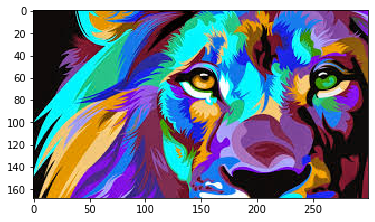

In [2]:
%matplotlib inline
#The address of the image/location of the image(path)
img_path=r'C:\Users\Debjani Khan\Downloads\colors.jpg'
image = cv2.imread(img_path)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)


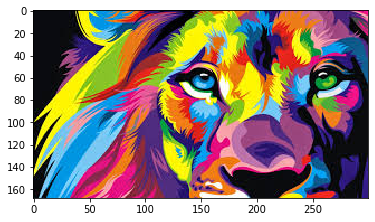

In [3]:
#Convert the default rendering BlueGreenRed to RedGreenBlue 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

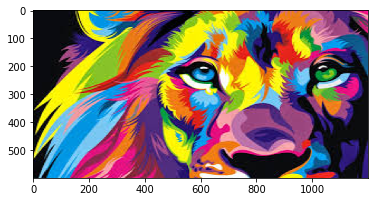

In [4]:
#To resize the image
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

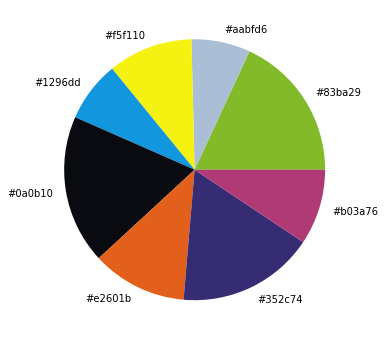

In [5]:
#RGB to Hex conversion, displaying hex value of the given color
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
#Getting the image by passing the image path as argument
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    #KMeans algorithm is used to find clusters of colors
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        #A pie chart is used to depict the output
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        
    return rgb_colors
if __name__=="__main__":
    get_colors(image, 8, True)

#           Searching images based on colour

In [6]:
#The path of the image ,where it is stored
IMAGE_DIRECTORY = r'C:\Users\Debjani Khan\Downloads\images'
#Defining a dictionary of colors
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
    }
images = []
#To read images in the folder and store them in the list named 'image'
for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

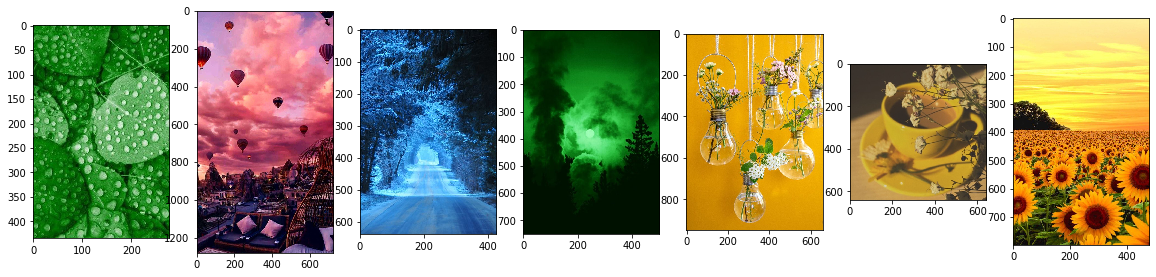

In [7]:
#To show all the images in the folder
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [8]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        #To calculate the difference between the color selected from the color dictionary and color from the current image
        diff = deltaE_cie76(selected_color, curr_color)
        #If the difference is less than threshold value, the image is selected
        if (diff < threshold):
            select_image = True
    
    return select_image

In [9]:

def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

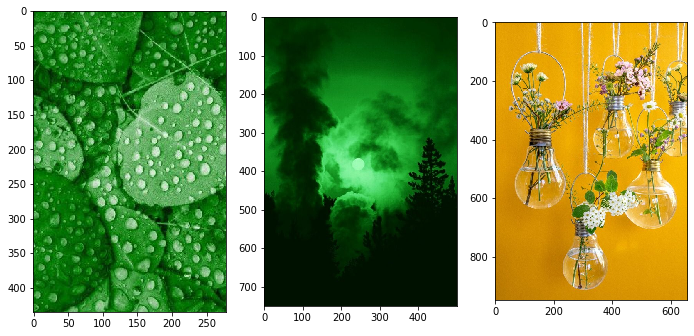

In [10]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

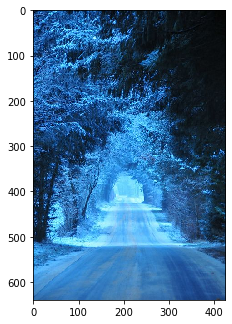

In [11]:
plt.figure(figsize = (20,10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

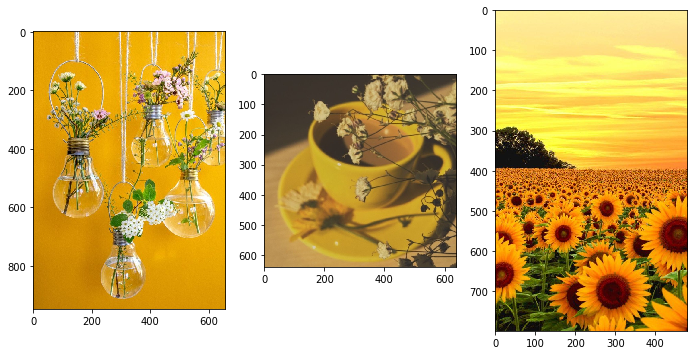

In [12]:
plt.figure(figsize = (20,10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)